We assume that the value function is quadratic in $x$,

$V(t,x)=f(t)x^2+h(t)x+k(t)$. 

By substituting $V$ in the HJB PDE we get the following system of Riccati ODE.

$0=f'+a+2cf-\frac{d^2}{A}f^2;  f(T)=\alpha$

$0=h'+b-\frac{(B+dh)d}{A}f;  h(T)=\beta$

$0=k'+\sigma^2 f-\frac{1}{4A}(B+dh)^2;  k(T)=\gamma$

By solving this system of first order ODE we can get $f,h,t$ in closed form and we obtain the optimal solution as

$u^*=-\frac{B+d(2xf(t)+h(t))}{2A}$

First let's write all equations forward and then change $t$ to $T-t$ at the end.

$f'=a+2cf-\frac{d^2}{A}f^2;  f(0)=\alpha$

$h'=b-\frac{(B+dh)d}{A}f;  h(0)=\beta$

$k'=\sigma^2 f-\frac{1}{4A}(B+dh)^2;  k(0)=\gamma$

$f$ satisfies a Riccati ODE: $f(t)=-\dfrac{1}{q_2}\dfrac{\lambda_1 e^{\lambda_1 (T-t)}+C\lambda_2 e^{\lambda_2 (T-t)}}{ e^{\lambda_1 (T-t)}+C e^{\lambda_2 (T-t)}}$ with

$C=-\dfrac{\lambda_1+q_2\alpha}{\lambda_2+q_2\alpha}$, $q_2=-\dfrac{d^2}{A}$, $q_1=2c$, $q_0=a$, $\lambda_1=\dfrac{q_1+\sqrt{q_1^2-2q_0q_2}}{2}$, and $\lambda_2=\dfrac{q_1-\sqrt{q_1^2-2q_0q_2}}{2}$


We modify the $h$ ODE by:

$h'=b-\frac{Bd}{A}f-\frac{d^2}{A}fh = b-\frac{Bd}{A}f+q_2fh ;  h(0)=\beta$

$h'-q_2fh= b-\frac{Bd}{A}f$


$\left( e^{-q_2\int fdt}h\right)'= e^{-q_2\int fdt}(b-\frac{Bd}{A}f)$


In the process of finding $f$, we note that $f = -\dfrac{U'(t)}{q_2U(t)}$, where $U(t)=e^{\lambda_1 t}+Ce^{\lambda_2 t}$. Thus,

$-q_2\int f dt = \ln U(t)$ and $e^{-q_2\int fdt}=U(t)$.


$U(t) h(t) = \int U(t)(b-\frac{Bd}{A}f)dt = \int U(t)(b+\frac{Bd}{A}\dfrac{U'(t)}{q_2U(t)})dt= \int (U(t)b-\frac{B}{d}{U'(t)})dt$


$h(t) =  \dfrac{1}{U(t)}\int (U(t)b+\frac{B}{d}{U'(t)})dt=b\dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}+C_2}{U(t)}-\frac{B}{d}$, where $C_2$ is such that $h(0)=\beta$:

$C_2=\frac{(\beta+\frac{B}{d})(1+C)}{b}-(\frac{1}{\lambda_1}+\frac{C}{\lambda_2})$

For $k'=\sigma^2 f-\frac{1}{4A}(B+dh)^2;  k(0)=0$:

$\sigma^2\int f dt = -\dfrac{\sigma^2}{q_2}\ln U(t) +C_3$


To find $\int (B+dh)^2 dt$ note that $B+dh=b\dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}+C_2}{U(t)}$

$\int (B+dh)^2 dt=b^2\displaystyle\int \left(\dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}+C_2}{U(t)}\right)^2dt=b^2\displaystyle\int \dfrac{(\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t})^2}{U^2(t)}dt+2b^2C_2\displaystyle\int \dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}}{U^2(t)}dt+C^2_2\displaystyle\int \dfrac{1}{U^2(t)}dt$ 

The above three integrals are evaluated here:

https://www.wolframalpha.com/input?i=%5Cint+%28n+%2B+c+me%5E%7Bbt%7D%29%2F%28%281%2B+c+e%5E%7Bbt%7D%29%5E2%29dt

https://www.wolframalpha.com/input?i=%5Cint+%28%28n+%2B+c+me%5E%7Bbt%7D%29%5E2%29%2F%28%281%2B+c+e%5E%7Bbt%7D%29%5E2%29dt

https://www.wolframalpha.com/input?i=%5Cint+1%2F%28%28e%5E%7Bat%7D%2B+c+e%5E%7Bbt%7D%29%5E2%29dt







 $f(t)=-\dfrac{1}{q_2}\dfrac{\lambda_1 e^{\lambda_1 (T-t)}+C\lambda_2 e^{\lambda_2 (T-t)}}{ e^{\lambda_1 (T-t)}+C e^{\lambda_2 (T-t)}}$ with

$C=-\dfrac{\lambda_1+q_2\alpha}{\lambda_2+q_2\alpha}$, $q_2=-\dfrac{d^2}{A}$, $q_1=2c$, $q_0=a$, $\lambda_1=\dfrac{q_1+\sqrt{q_1^2-4q_0q_2}}{2}$, and $\lambda_2=\dfrac{q_1-\sqrt{q_1^2-4q_0q_2}}{2}$


$h(t) =  \dfrac{1}{U(t)}\int (U(t)b+\frac{B}{d}{U'(t)})dt=b\dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}+C_2}{U(t)}-\frac{B}{d}$, where $C_2$ is such that $h(0)=\beta$:

$C_2=\frac{(\beta+\frac{B}{d})(1+C)}{b}-(\frac{1}{\lambda_1}+\frac{C}{\lambda_2})$

For $k'=\sigma^2 f-\frac{1}{4A}(B+dh)^2;  k(0)=0$:

$\sigma^2\int f dt = -\dfrac{\sigma^2}{q_2}\ln U(t) +C_3$


To find $\int (B+dh)^2 dt$ note that $B+dh=b\dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}+C_2}{U(t)}$

$\int (B+dh)^2 dt=b^2\displaystyle\int \left(\dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}+C_2}{U(t)}\right)^2dt=b^2\displaystyle\int \dfrac{(\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t})^2}{U^2(t)}dt+2b^2C_2\displaystyle\int \dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}}{U^2(t)}dt+C^2_2\displaystyle\int \dfrac{1}{U^2(t)}dt$ 

The above three integrals are evaluated here:

https://www.wolframalpha.com/input?i=%5Cint+%28n+%2B+c+me%5E%7Bbt%7D%29%2F%28%281%2B+c+e%5E%7Bbt%7D%29%5E2%29dt

https://www.wolframalpha.com/input?i=%5Cint+%28%28n+%2B+c+me%5E%7Bbt%7D%29%5E2%29%2F%28%281%2B+c+e%5E%7Bbt%7D%29%5E2%29dt

https://www.wolframalpha.com/input?i=%5Cint+1%2F%28%28e%5E%7Bat%7D%2B+c+e%5E%7Bbt%7D%29%5E2%29dt







In [32]:
import numpy as np
import time
from scipy import misc
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(style='normal', size=20)
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import math
import pandas as pd
import scipy.integrate as integrate
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

import json

from IPython.display import display, Math, Markdown
import seaborn as sns
sns.set(font_scale = 2)

import pandas as pd


In [81]:
lqsc_params = {
    'T':1,
    'a':0.5,
    'b':0.5,
    'c':1,
    'd':1,
    'A':1,
    'B':1,
    'sigma':1.,
    'alpha':0.5,
    'beta':0.5,
    'gamma':0.0,
    'num_time_steps':1000,
    }

In [93]:
# Define the system of ODEs
class Riccati(object):
    def __init__(self, params):
        self.params = params
        self.num_time_steps = self.params['num_time_steps']
        self.T = self.params['T']
        self.a = self.params['a']
        self.b = self.params['b']
        self.c = self.params['c']
        self.d = self.params['d']
        self.A = self.params['A']
        self.B = self.params['B']
        self.sigma = self.params['sigma']
        self.alpha = self.params['alpha']
        self.beta = self.params['beta']
        self.gamma = self.params['gamma']
        # Initial conditions
        self.initial_conditions = [self.alpha, self.beta, self.gamma]  # Initial values for y1, y2, and y3
        q0=self.a
        q1=2*self.c
        q2 = -self.d**2/self.A
        lb1=0.5*(q1+np.sqrt(q1**2-4*q0*q2))
        lb2 = -lb1+q1
        C1 = -(lb1+q2*self.alpha)/(lb2+q2*self.alpha)
        C2 = (self.beta+self.B/self.d)*(1+C1)/self.b-(1/lb1+C1/lb2)
        self.f_func = lambda t: -1/q2*(lb1*np.exp(lb1*(self.T-t))+C1*lb2*np.exp(lb2*(self.T-t)))/(np.exp(lb1*(self.T-t))+C1*np.exp(lb2*(self.T-t)))
        self.h_func = lambda t: self.b*((1/lb1)*np.exp(lb1*(self.T-t))+C1*(1/lb2)*np.exp(lb2*(self.T-t))+C2)/(np.exp(lb1*(self.T-t))+C1*np.exp(lb2*(self.T-t)))-self.B/self.d
        self.integrand = lambda t: self.sigma**2*self.f_func(t) -(self.B+self.d*self.h_func(t))**2/(4*self.A)
        self.k_func = lambda t: integrate.quad(lambda x: self.integrand(x), 0, self.T-t)[0]      
        
    def __call__(self,tx):
            return np.array([self.f_func(tx[i,0])*np.power(tx[i,1],2)+self.h_func(tx[i,0])*tx[i,1]+self.k_func(tx[i,0]) for i in range(tx.shape[0])])
  

    def system_of_odes(self, t, y):
        dydt = [
            self.a+2*self.c*y[0]-(np.power(self.d,2)*np.power(y[0],2))/self.A,                 # df/dt = a+2cf-d^2*f^2/A; f(0)=alpa
            self.b-(self.B+self.d*y[1])*self.d*y[0]/self.A,                       # dh/dt = b-(B+dh)fd/A; h(0)=beta
            np.power(self.sigma,2)*y[0]-(self.B+self.d*y[1])**2/(4*self.A)        # dk/dt = sigma^2*f-(B+dh)^2/4A; k(0)=0
        ]
        return dydt

    def approx_sol(self):
        # Time span
        t_span = (0, self.T)  # Start and end time
        t_eval=np.linspace(0, 1, self.num_time_steps+1)
        # Solve the system of ODEs
        sol = solve_ivp(self.system_of_odes,t_span, self.initial_conditions, t_eval=np.linspace(0, 1, self.num_time_steps+1))
        #
        f=np.flip(sol.y[0])
        h=np.flip(sol.y[1])
        k=np.flip(sol.y[2])
        return (sol.t,f,h,k)
    
        



In [94]:
r = Riccati(lqsc_params)

In [95]:
t, f,k,h = r.approx_sol()

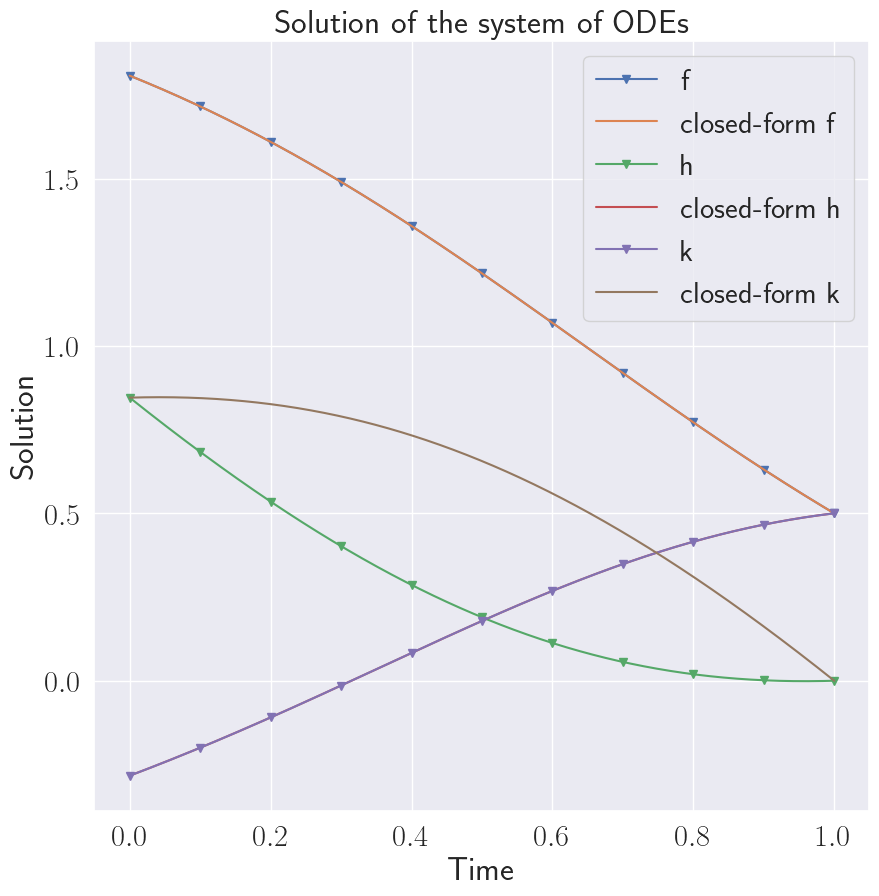

In [96]:
# Plot the solution
plt.figure(figsize=(10,10),dpi=100);
plt.plot(t, f, label='f',marker='v', markevery=100)
plt.plot(t,r.f_func(t), label='closed-form f')
plt.plot(t, h, label='h',marker='v', markevery=100)
plt.plot(t,r.h_func(t), label='closed-form h')
plt.plot(t, k, label='k',marker='v', markevery=100)
plt.plot(t,[r.k_func(v) for v in t], label='closed-form k')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.title('Solution of the system of ODEs')


plt.legend()
plt.grid(True)
plt.show()
# print(t_eval)
# print(f.shape,state_var.shape)